In [1]:
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols
import sympy
from sympy.tensor.tensor import TensorIndexType, TensorHead, tensor_indices

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi = sympy.symbols("t r theta phi")

In [3]:
dt, dr, dtheta, dphi = sympy.symbols(r"dt dr d\theta d\phi")

In [4]:
a, delta, m = sympy.symbols("a delta m")

In [5]:
r_tilde, delta_r, delta_theta, W, xi = sympy.symbols("\\tilde{r} Delta_r Delta_theta W Xi")

In [6]:
dr_tilde = sympy.symbols("d\\tilde{r}")

In [7]:
omega = sympy.symbols("Omega")

In [8]:
r_tilde_plus = sympy.symbols("\\tilde{r}_+")

### Metric

In [9]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2
metric_orig += W * (dr_tilde ** 2 / delta_r + dtheta ** 2 / delta_theta)

In [10]:
metric_orig

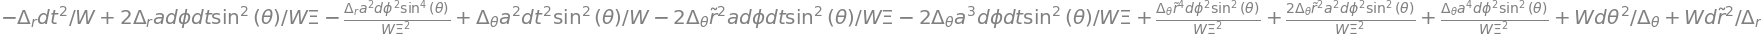

In [11]:
metric = metric_orig.expand()
metric

In [12]:
metric_list_matrix = [[0 for i in range(4)] for i in range(4)]

# dt
metric_list_matrix[0][0] = metric.coeff(dt ** 2)
metric_list_matrix[0][1] = metric.coeff(dt * dr_tilde) / 2
metric_list_matrix[0][2] = metric.coeff(dt * dtheta) / 2
metric_list_matrix[0][3] = metric.coeff(dt * dphi) / 2

# dr_tilde
metric_list_matrix[1][0] = metric.coeff(dr_tilde * dt) / 2
metric_list_matrix[1][1] = metric.coeff(dr_tilde ** 2)
metric_list_matrix[1][2] = metric.coeff(dr_tilde * dtheta) / 2
metric_list_matrix[1][3] = metric.coeff(dr_tilde * dphi) / 2

# dtheta
metric_list_matrix[2][0] = metric.coeff(dtheta * dt) / 2
metric_list_matrix[2][1] = metric.coeff(dtheta * dr_tilde) / 2
metric_list_matrix[2][2] = metric.coeff(dtheta ** 2)
metric_list_matrix[2][3] = metric.coeff(dtheta * dphi) / 2

# dphi
metric_list_matrix[3][0] = metric.coeff(dphi * dt) / 2
metric_list_matrix[3][1] = metric.coeff(dphi * dr_tilde) / 2
metric_list_matrix[3][2] = metric.coeff(dphi * dtheta) / 2
metric_list_matrix[3][3] = metric.coeff(dphi ** 2)

In [13]:
syms = sympy.symbols("t \\tilde{r} theta phi")

In [14]:
sch = MetricTensor(metric_list_matrix, syms)
sch.tensor().simplify()

⎡                         2    2                                              
⎢           -Δᵣ + Δₜₕₑₜₐ⋅a ⋅sin (θ)                                           
⎢           ───────────────────────              0     0                      
⎢                      W                                                      
⎢                                                                             
⎢                                                W                            
⎢                      0                         ──    0                      
⎢                                                Δᵣ                           
⎢                                                                             
⎢                                                      W                      
⎢                      0                         0   ──────                   
⎢                                                    Δₜₕₑₜₐ                   
⎢                                                   

In [15]:
ch = ChristoffelSymbols.from_metric(sch)
ch = ch.tensor()
ch

⎡⎡                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                  

In [16]:
Lorentzian = TensorIndexType('Lorentzian', dummy_name='L')
i0, i1, i2, i3 = tensor_indices('i0:4', Lorentzian)

In [17]:
K = [1, 0, 0, -omega]
K

In [18]:
gKK_tensor = TensorHead('gKK', [Lorentzian] * 4)
repl = {gKK_tensor(-i0, -i1, i2, i3): sympy.tensorproduct(sympy.tensorproduct(sch.tensor(), K), K)}

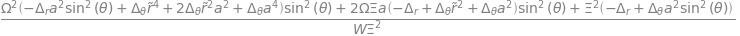

In [19]:
K_squared = gKK_tensor(-i0, -i1, i1, i0).replace_with_arrays(repl)
K_squared = sympy.simplify(K_squared)
K_squared

In [20]:
K_squared_num = sympy.fraction(K_squared)[0]
K_squared_num

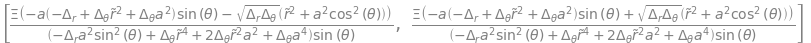

In [21]:
sols = sympy.solve(K_squared_num, omega)
sols

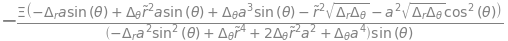

In [22]:
sols[1].simplify().factor()

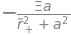

In [23]:
omega_val = -a * xi / (r_tilde_plus ** 2 + a ** 2)
# omega_val = -a * (1 + r_tilde_plus ** 2) / (r_tilde_plus ** 2 + a ** 2)
omega_val


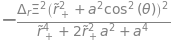

In [24]:
x = K_squared_num.subs({r_tilde: r_tilde_plus, omega: omega_val}).simplify().expand().simplify()
x

In [25]:
sympy.fraction(x)[0].simplify().trigsimp().factor().simplify()

Because $\Delta_r = 0$ when $\tilde{r}=\tilde{r}_+$, the Killing vector field is indeed a Killing horizon.

Try a different Killing vector.

In [26]:
g = sympy.symbols("g")

In [27]:
K = [1 + omega / a, 0, 0, omega]
K

In [28]:
gKK_tensor = TensorHead('gKK', [Lorentzian] * 4)
repl = {gKK_tensor(-i0, -i1, i2, i3): sympy.tensorproduct(sympy.tensorproduct(sch.tensor(), K), K)}

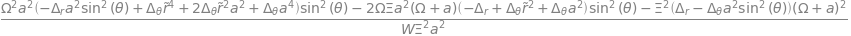

In [29]:
K_squared = gKK_tensor(-i0, -i1, i1, i0).replace_with_arrays(repl)
K_squared = sympy.simplify(K_squared)
K_squared

In [30]:
K_squared_num = sympy.fraction(K_squared)[0].simplify()
K_squared_num

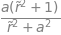

In [31]:
omega_val = a * (1 + r_tilde ** 2) / (r_tilde ** 2 + a ** 2)
omega_val

In [32]:
(sympy.fraction(K_squared_num.subs({omega: omega_val}).simplify())[0] / a ** 2).subs({xi: 1 - a ** 2}).expand().simplify().subs({delta_theta: 1 - a ** 2 * sympy.cos(theta) ** 2}).expand().trigsimp()

Try to compute angular velocity directly.

In [33]:
g_tt = sch[0, 0]
g_tphi = sch[0, 3]
g_phiphi = sch[3, 3]

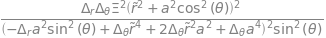

In [34]:
part1 = ((g_tphi / g_phiphi) ** 2 - g_tt / g_phiphi).simplify()
part1

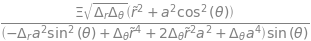

In [35]:
part1_sqrt = xi * sympy.sqrt(delta_r * delta_theta) * (r_tilde ** 2 + a ** 2 * sympy.cos(theta) ** 2)
part1_sqrt /= sympy.sin(theta) * (-delta_r * a ** 2 * sympy.sin(theta) ** 2 + delta_theta * r_tilde ** 4 + 2 * delta_theta * r_tilde ** 2 * a ** 2 + delta_theta * a ** 4)
part1_sqrt

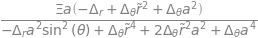

In [36]:
part2 = (-g_tphi / g_phiphi).simplify()
part2

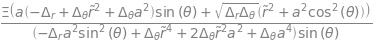

In [37]:
(part2 + part1_sqrt).simplify()

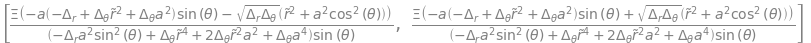

In [38]:
sols

In [39]:
sols[0].subs({delta_r: 0}).simplify()

These produce the same results.

Perform a numerical comparison.

In [40]:
import numpy as np

In [41]:
def eval_omega(r_val, theta_val, a_val, m_val, delta_val):
    r_tilde_val = r_val + 2 * m_val * np.sinh(delta_val) ** 2
    delta_r_val = r_val ** 2 + a_val ** 2 - 2 * m_val * r_val + r_tilde_val ** 2 * (r_tilde_val ** 2 + a_val ** 2)
    xi_val = 1 - a_val ** 2
    delta_theta_val = 1 - a_val ** 2 * np.cos(theta_val) ** 2
    
    x = []
    for i in range(2):
        x.append(
            float(
                sols[i].subs({
                    xi: xi_val,
                    a: a_val,
                    delta_r: delta_r_val,
                    r_tilde: r_tilde_val,
                    theta: theta_val,
                    delta_theta: delta_theta_val
                })
            )
        )

    return x

In [42]:
r_val = 5
theta_val = 1
a_val = 0.5
m_val = 0.25
delta_val = 0.1

eval_omega(r_val, theta_val, a_val, m_val, delta_val)

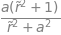

In [43]:
omega_val

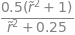

In [44]:
omega_val.subs({xi: 1 - a_val ** 2, a: a_val, r_tilde_plus: r_val + 2 * m_val * np.sinh(delta_val) ** 2})

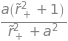

In [45]:
omega_val_2 = a * (1 + r_tilde_plus ** 2) / (r_tilde_plus ** 2 + a ** 2)
omega_val_2

In [46]:
omega_val_2.subs({xi: 1 - a_val ** 2, a: a_val, r_tilde_plus: r_val + 2 * m_val * np.sinh(delta_val) ** 2})